In [444]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [445]:
df = pd.read_csv("https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [446]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [447]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

Data cleaning.   Convert date to datetime type.   Then extract year.

In [448]:
df['date'] = pd.to_datetime(df['date']) 
df['year'] = df['date'].dt.year 

Check if there is any null value

In [449]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
dtype: int64

In [450]:
df = df.drop(['id', 'date', 'lat', 'long'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
 17  year           21613 non-null  int32  
dtypes: flo

In [451]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015


In [452]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652,2014.322954
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631,0.467616
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,2014.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,2014.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,2015.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,2015.000000


Replace the sqft_basement with 0 and 1. 0 means no basement. 1 means yes.    
Replace the yr_built with 0 and 1.  0 means no renovation. 1 means yes.

In [453]:
df['basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df['renovation'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df['house_age'] = df['year'] - df['yr_built']
df = df.drop(['sqft_above', 'year', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'sqft_basement', 'yr_built'], axis=1)


In [454]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,basement,renovation,house_age
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,98077.939805,0.392680,0.042289,43.317818
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,53.505026,0.488358,0.201253,29.375493
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,98001.000000,0.000000,0.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,98033.000000,0.000000,0.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,98065.000000,0.000000,0.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,98118.000000,1.000000,0.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,98199.000000,1.000000,1.000000,115.000000


In [455]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [456]:
df.groupby('zipcode')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
zipcode,,,,,
98001,260000.0,3.0,2.000,1822.0,9287.0
98002,235000.0,3.0,1.750,1570.0,7282.0
98003,267475.0,3.0,2.000,1780.0,8816.0
98004,1150000.0,4.0,2.500,2660.0,11119.0
98005,765475.0,4.0,2.375,2505.0,12220.0
...,...,...,...,...,...
98177,554000.0,3.0,2.000,2120.0,8210.0
98178,278277.0,3.0,1.750,1725.0,7200.0
98188,264000.0,3.0,1.750,1690.0,8913.0


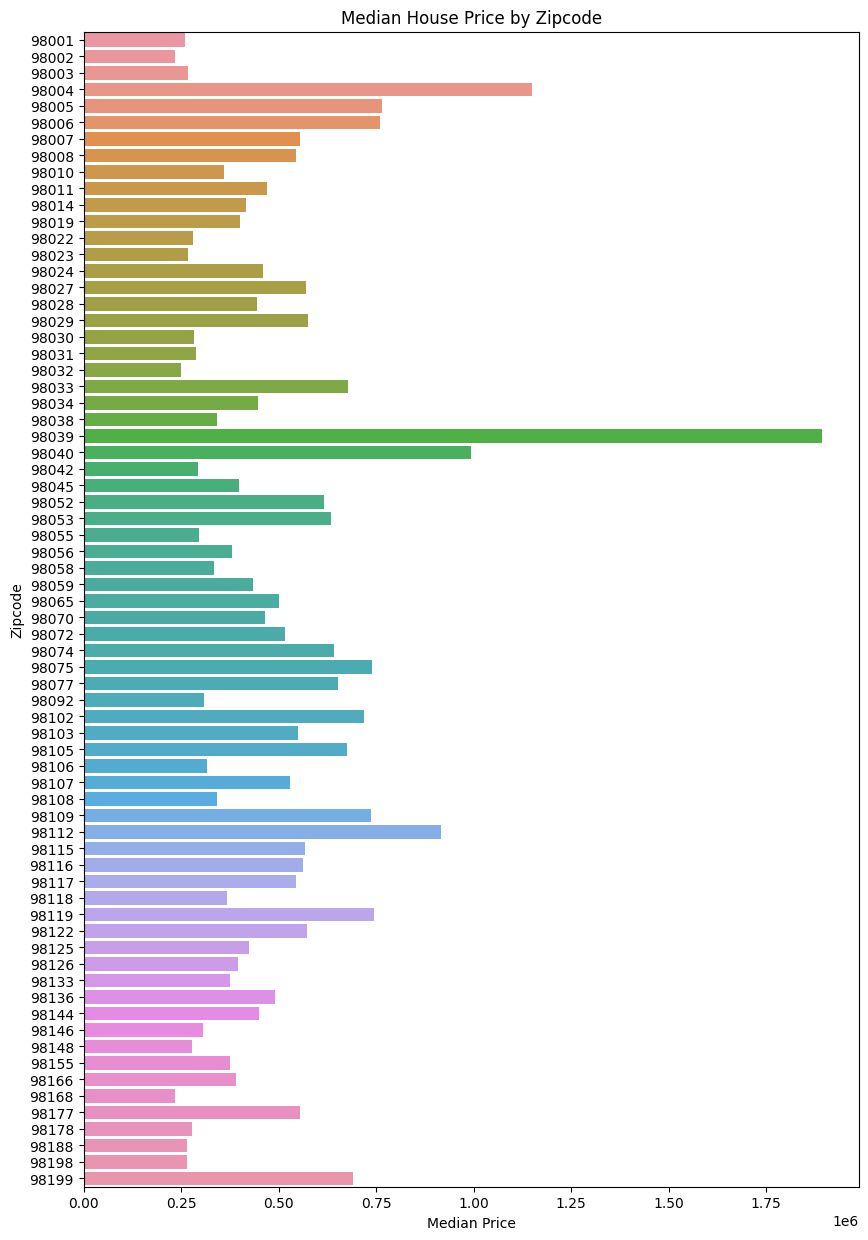

In [457]:
median_price_per_zipcode = df.groupby('zipcode')['price'].median()
median_price_df = median_price_per_zipcode.reset_index()

# Sort the DataFrame by price to make the plot more readable
median_price_df = median_price_df.sort_values('price')

# Create a bar plot
plt.figure(figsize=(10, 15))  # Increase figure size for better visibility
sns.barplot(y='zipcode', x='price', data=median_price_df, orient='h')

plt.title('Median House Price by Zipcode')
plt.xlabel('Median Price')
plt.ylabel('Zipcode')
plt.show()

In [458]:
df = df.drop(['zipcode' ], axis=1)

In [459]:
df.groupby('waterfront')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
waterfront,,,,,
0,450000.0,3.0,2.25,1910.0,7588.5
1,1400000.0,3.0,2.50,2850.0,17342.0


In [460]:
df.groupby('view')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
view,,,,,
0,432500.0,3.0,2.25,1850.0,7500.0
1,690944.0,4.0,2.25,2420.0,8734.5
2,675000.0,3.0,2.50,2470.0,8505.0
3,802500.0,4.0,2.50,2840.0,9628.5
4,1185000.0,4.0,2.50,3050.0,13122.0


In [461]:
df.groupby('condition')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
condition,,,,,
1,262500.0,2.0,1.00,1000.0,9300.0
2,279000.0,3.0,1.00,1320.0,8380.0
3,450000.0,3.0,2.50,1970.0,7220.0
4,440000.0,3.0,1.75,1820.0,8530.0
5,526000.0,3.0,2.00,1880.0,7410.0


In [462]:
df.groupby('grade')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
grade,,,,,
1,142000.0,0.0,0.000,290.0,20875.0
3,262000.0,1.0,0.000,600.0,24501.0
4,205000.0,2.0,1.000,660.0,8636.0
5,228700.0,2.0,1.000,905.0,7175.0
6,275276.5,3.0,1.000,1120.0,7196.0
7,375000.0,3.0,1.750,1630.0,7410.0
8,510000.0,3.0,2.500,2150.0,7267.0
9,720000.0,4.0,2.500,2820.0,8160.0
10,914327.0,4.0,2.750,3450.0,11245.0


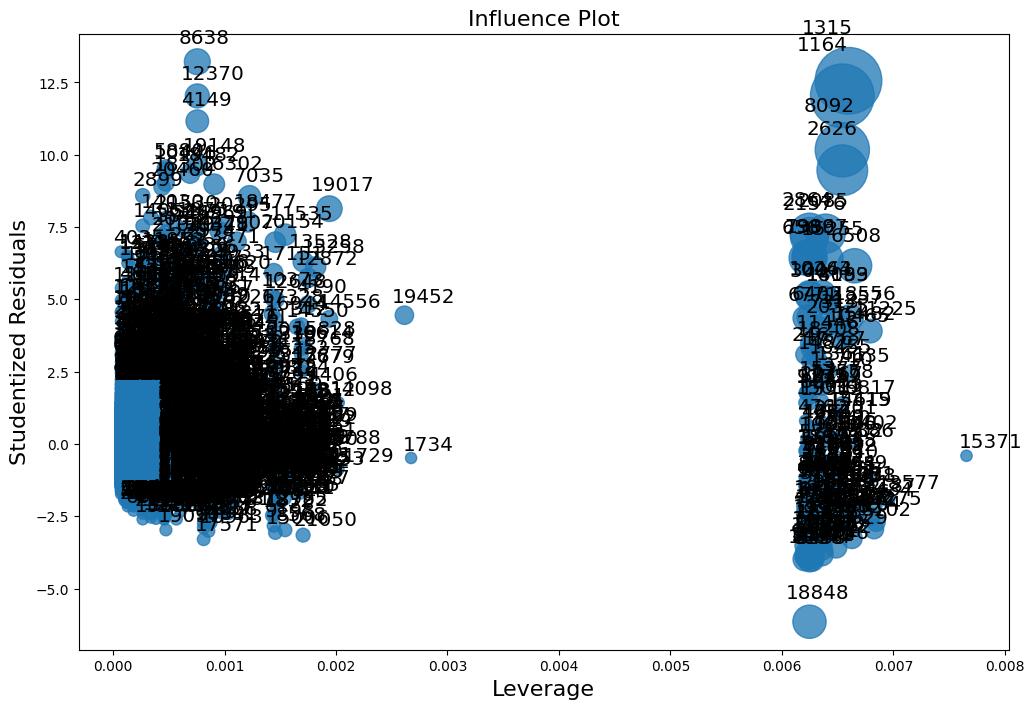

In [463]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results_1, ax=ax, criterion='cooks')

In [464]:

df = df.drop([3914, 7252, 9254, 4411, 1448])

Check model with original 4 cat columns

In [465]:
results_1 = ols("price ~ waterfront + view + condition + grade", data=df).fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6409.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:37:31   Log-Likelihood:            -2.9838e+05
No. Observations:               21608   AIC:                         5.968e+05
Df Residuals:                   21603   BIC:                         5.968e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.185e+06   1.52e+04    -77.997      0.0

Check model with with more cat columns such as basement, renovation.  
Get higher R-squared.  

In [510]:
results_2 = ols("price ~ waterfront + view + condition + grade + basement + renovation", data=df).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     4580.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:42:27   Log-Likelihood:            -2.9797e+05
No. Observations:               21608   AIC:                         5.960e+05
Df Residuals:                   21601   BIC:                         5.960e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.203e+06   1.49e+04    -80.458      0.0

Check model with num columns

In [509]:
results_3 = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + house_age", data=df).fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     4394.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:42:23   Log-Likelihood:            -2.9822e+05
No. Observations:               21608   AIC:                         5.965e+05
Df Residuals:                   21601   BIC:                         5.965e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.152e+05   9451.418    -22.774      

Combine all cat and num columns in the model.  
Get 65.6% R-squared. A good number.  

In [516]:
results_4 = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + house_age + waterfront + view + condition + grade + basement + renovation", data=df).fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     3431.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:50:39   Log-Likelihood:            -2.9531e+05
No. Observations:               21608   AIC:                         5.906e+05
Df Residuals:                   21595   BIC:                         5.907e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.025e+06   1.67e+04    -61.516      

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21608 non-null  float64
 1   bedrooms       21608 non-null  int64  
 2   bathrooms      21608 non-null  float64
 3   sqft_living    21608 non-null  int64  
 4   sqft_lot       21608 non-null  int64  
 5   floors         21608 non-null  float64
 6   waterfront     21608 non-null  int64  
 7   view           21608 non-null  int64  
 8   condition      21608 non-null  int64  
 9   grade          21608 non-null  int64  
 10  sqft_basement  21608 non-null  int64  
 11  yr_built       21608 non-null  int64  
 12  yr_renovated   21608 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.3 MB


In [519]:
# separate features and target
categorical_features = ['waterfront','view', 'condition', 'grade', 'basement', 'renovation']
#categorical_features = ['waterfront','view', 'condition', 'grade']
numerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'house_age']

target = ['price']

In [520]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)


In [521]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [522]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [523]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [524]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'basement', 'renovation']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'house_age'])])),
                ('regressor', LinearRegression())])

In [525]:
pred = linear_regression.predict(X_test)
pred

array([[361792.],
       [452168.],
       [551528.],
       ...,
       [400184.],
       [690184.],
       [413464.]])

In [526]:
error = pred - y_test
print(error)

          price
14919 -100808.0
19875   22168.0
2702  -123472.0
21289  -57960.0
16021 -137036.0
...         ...
11556  857120.0
6054   181552.0
4400  -174816.0
9299    30184.0
5327   -64536.0

[6483 rows x 1 columns]


In [527]:
from sklearn.metrics import mean_squared_error

In [528]:
np.sqrt(mean_squared_error(pred,y_test))

198645.52981429137

In [529]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [530]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'basement', 'renovation']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'house_age'])])),
                ('regressor', Ridge(alpha=3.0))])

In [531]:
pred_ridge = ridge_regression.predict(X_test)

In [532]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

198802.6209806514

In [533]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [534]:
lasso_regression.fit(X_train, y_train)

C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.779e+13, tolerance: 1.933e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'basement', 'renovation']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'house_age'])])),
                ('regressor', Lasso())])

In [535]:
lasso_pred = lasso_regression.predict(X_test)

In [536]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

198713.38757620577

In [537]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [538]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'basement', 'renovation']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'house_age'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [539]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [540]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

230170.47997836056